In [19]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [21]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe', options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_17808\1991402379.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


In [26]:
star_url ="https://www.starbucks.co.kr/store/store_map.do"
wd.get(star_url)

In [27]:
# selenium 4 버전 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [28]:
### TIP !!! ####
## 아래는 셀레니움3버전 코드임 ##
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [29]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
# len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [30]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [31]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [32]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [33]:
gu_list = list(set(df_star["구"]))
gu_list

['동작구',
 '송파구',
 '서초구',
 '성북구',
 '종로구',
 '도봉구',
 '성동구',
 '강남구',
 '마포구',
 '관악구',
 '용산구',
 '강동구',
 '금천구',
 '구로구',
 '광진구',
 '중구',
 '강북구',
 '서대문구',
 '은평구',
 '강서구',
 '동대문구',
 '영등포구',
 '양천구',
 '노원구',
 '중랑구']

In [34]:
#### 이디야 ###
edi_url = "https://www.ediya.com/contents/find_store.html"
wd = webdriver.Chrome("./chromedriver.exe", options=options)
wd.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_17808\2508102024.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options=options)


In [35]:
wd.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
wd.find_element(By.XPATH, '//*[@id="keyword"]').clear
wd.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 강남구")
wd.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()

html = wd.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info

[]

In [36]:
edi_info = []



for gu in gu_list:
    wd.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH, '//*[@id="keyword"]').clear
    wd.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

769

In [37]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
764,중계점,노원구,서울 노원구 동일로204가길 34 (중계동)
765,중계중앙점,노원구,서울 노원구 덕릉로73길 18 (중계동)
766,태릉입구역점,노원구,"서울 노원구 공릉로 105 (공릉동, 성종빌딩)"
767,하계온천점,노원구,서울 노원구 노원로 257 (하계동)
768,하계을지점,노원구,서울 노원구 공릉로 326 (하계동)


In [38]:
# 스타벅스 데이터
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,동작구,11
1,송파구,34
2,서초구,48
3,성북구,15
4,종로구,39
5,도봉구,4
6,성동구,13
7,강남구,89
8,마포구,35
9,관악구,12


In [39]:
# 이디야 데이터
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,동작구,22
1,송파구,39
2,서초구,29
3,성북구,34
4,종로구,62
5,도봉구,24
6,성동구,23
7,강남구,56
8,마포구,76
9,관악구,28


In [40]:
# 매장수 차이 데이터
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,동작구,22,11,11
1,송파구,39,34,5
2,서초구,29,48,-19
3,성북구,34,15,19
4,종로구,62,39,23
5,도봉구,24,4,20
6,성동구,23,13,10
7,강남구,56,89,-33
8,마포구,76,35,41
9,관악구,28,12,16


In [41]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_17808\3681494351.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [42]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'cmr10',
 'STIXSizeThreeSym',
 'cmtt10',
 'cmb10',
 'DejaVu Sans',
 'cmsy10',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'cmss10',
 'Segoe UI',
 'Segoe UI Historic',
 'Cambria',
 'Elephant',
 'Franklin Gothic Book',
 'SimSun',
 'Trebuchet MS',
 'Sitka Small',
 'Gill Sans MT',
 'Javanese Text',
 'NanumBarunpenOTF',
 'Dubai',
 'Microsoft Tai Le',
 'Microsoft PhagsPa',
 'Courier New',
 'Segoe UI',
 'Candara',
 'Lucida Bright',
 'Harrington',
 'HYSinMyeongJo-Medium',
 'Boo

In [44]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

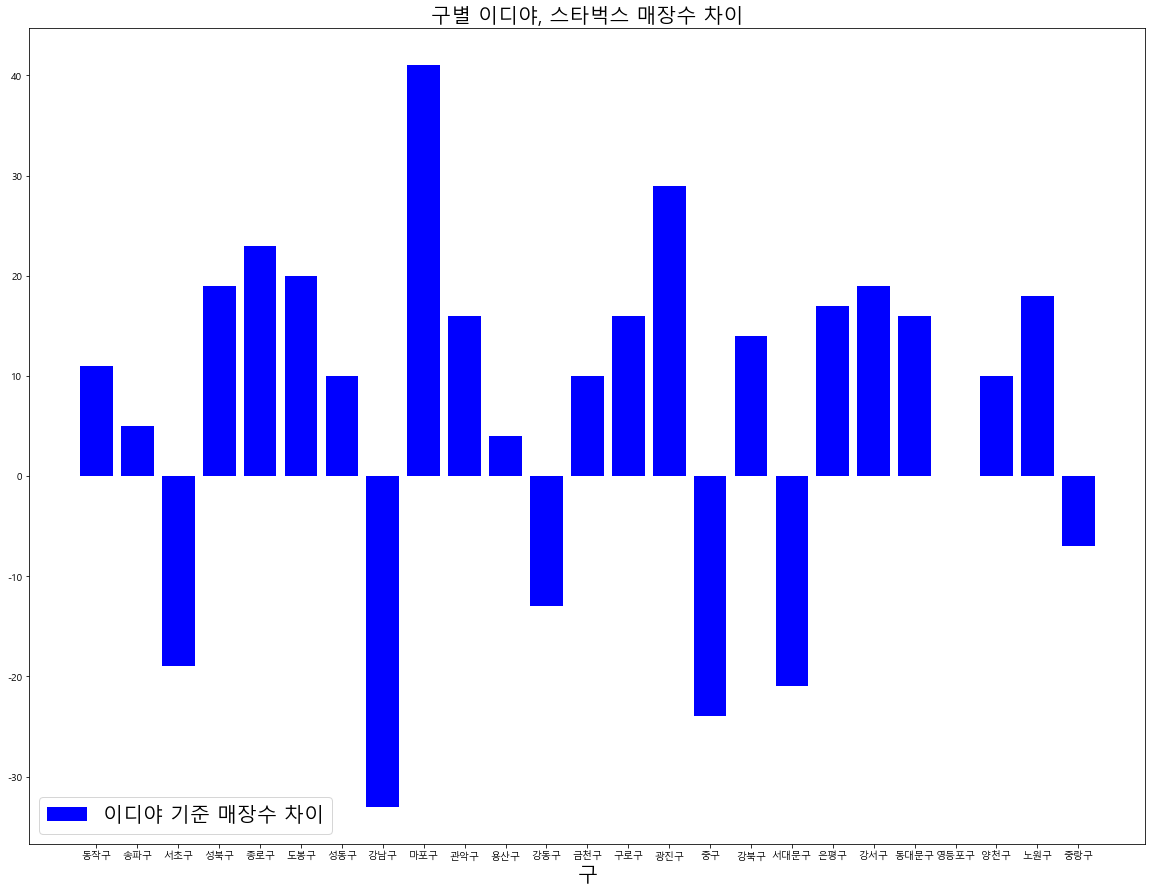

In [45]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()